In [ ]:
!pip install pandas nltk scikit-learn matplotlib


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.cluster import KMeans

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/DTU/02807/clean_sample_data.csv')

nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


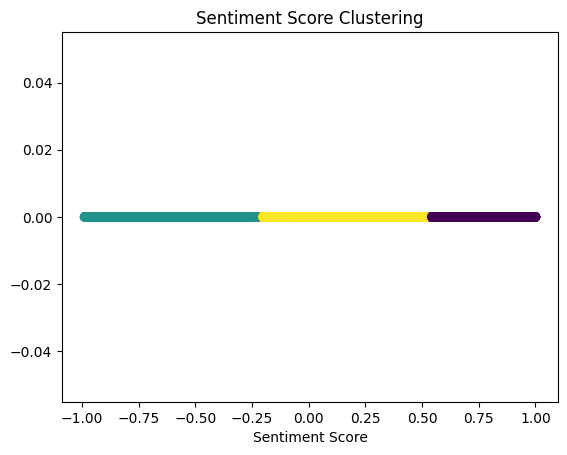

In [ ]:

def analyze_sentiment(review):
    if isinstance(review, str):
        return sia.polarity_scores(review)['compound']
    else:
        return 0  # or any other default value you deem appropriate

data['Sentiment_Score'] = data['Clean_Review'].apply(analyze_sentiment)

# Preparing data for clustering
X = data[['Sentiment_Score']]

# KMeans clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=0)
data['Cluster'] = kmeans.fit_predict(X)


plt.scatter(data['Sentiment_Score'], [0] * len(data), c=data['Cluster'], cmap='viridis')
plt.xlabel('Sentiment Score')
plt.title('Sentiment Score Clustering')
plt.show()

KNN algorithm

Accuracy: 0.46050670640834573


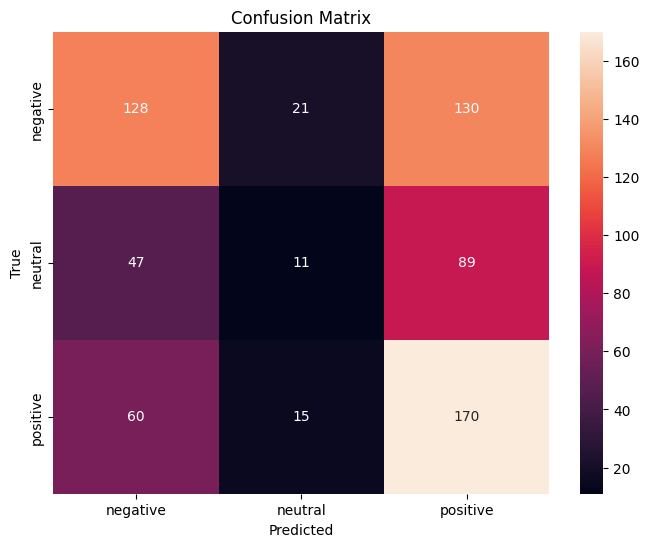

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from nltk.sentiment import SentimentIntensityAnalyzer
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Load the data
data = pd.read_csv('/content/drive/MyDrive/DTU/02807/clean_sample_data.csv')

# Label the sentiment scores
data['Sentiment_Label'] = data['overall'].apply(lambda x: 'negative' if x in [1, 2] else ('neutral' if x == 3 else 'positive'))

# Text vectorization
vectorizer = CountVectorizer()
data['Clean_Review'].fillna('', inplace=True)
X = vectorizer.fit_transform(data['Clean_Review']).toarray()

# Convert sentiment labels to numerical values
sentiment_mapping = {'negative': 0, 'neutral': 1, 'positive': 2}
y = data['Sentiment_Label'].map(sentiment_mapping).values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# KNN algorithm
def knn(X_train, y_train, X_test, k):
    predictions = []
    for test_point in X_test:
        distances = np.sqrt(np.sum((X_train - test_point) ** 2, axis=1))
        k_indices = np.argsort(distances)[:k]
        k_nearest_labels = y_train[k_indices]
        most_common = Counter(k_nearest_labels).most_common(1)
        predictions.append(most_common[0][0])
    return np.array(predictions)

# Choose the K value
k = 5  # 这个值可以通过交叉验证来选择

# Run KNN classification
y_pred = knn(X_train, y_train, X_test, k)

# Calculate accuracy
accuracy = np.mean(y_pred == y_test)
print(f'Accuracy: {accuracy}')

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=sentiment_mapping.keys(), yticklabels=sentiment_mapping.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


Accuracy: 0.4456035767511177


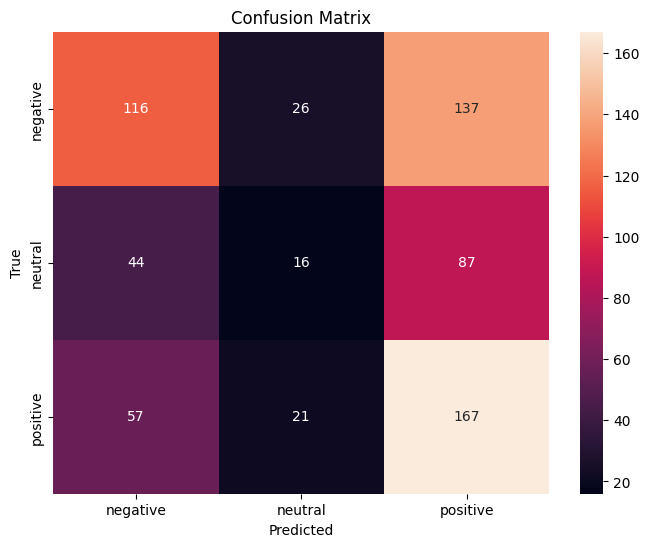

In [3]:
# Choose the K value
k = 3

# Run KNN classification
y_pred = knn(X_train, y_train, X_test, k)

# Calculate accuracy
accuracy = np.mean(y_pred == y_test)
print(f'Accuracy: {accuracy}')

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=sentiment_mapping.keys(), yticklabels=sentiment_mapping.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()